In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import cm
from copy import deepcopy
import multidop
import pyart
import read_brazil_radar as rbr
import tempfile
import os
import glob
import time
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [6]:
def read_dealise_grid_radar(filename, dbz_field = 'corrected_reflectivity',
                            vel_field = 'corrected_velocity',
                            shapepath = "../Data/GENERAL/shapefiles/sao_paulo"):
    # Reading radar file
    try:
        radar = pyart.aux_io.read_gamic(filename)
    except:
        radar = rbr.read_rainbow_hdf5(filename)
    
    # Correct dealising
    cp = deepcopy(radar.fields[dbz_field]['data'])
    radar.add_field_like(dbz_field, 'DT', cp, replace_existing=True)
    gatefilter = pyart.correct.GateFilter(radar)
    gatefilter.exclude_masked(dbz_field)
    corr_vel = pyart.correct.dealias_region_based(radar, vel_field=vel_field,
                                                  keep_original=False, 
                                                  gatefilter=gatefilter,
                                                  centered=True)
    radar.add_field('VT', corr_vel, replace_existing=True)
    
    # Plot uncorrected and corrected fields
    xlim, ylim = [[-47.5,-46.5], [-23.3,-22.5]]
    
    display = pyart.graph.RadarMapDisplay(radar)
    fig = plt.figure(figsize=(10,8))
    fig.set_facecolor('w')
    
    ax1 = fig.add_subplot(221)
    display.plot_ppi_map(dbz_field, 1, vmin=10, vmax=70, shapefile=shapepath,
                         max_lat=ylim[1], min_lat=ylim[0], min_lon=xlim[0], max_lon=xlim[1],
                         lat_lines=np.arange(ylim[0], ylim[1], .2), 
                         lon_lines=np.arange(xlim[0], xlim[1], .25))
    
    ax2 = fig.add_subplot(222)
    display.plot_ppi_map(vel_field, 1, vmin=-15, vmax=15, shapefile=shapepath,
                         max_lat=ylim[1], min_lat=ylim[0], min_lon=xlim[0], max_lon=xlim[1],
                         lat_lines=np.arange(ylim[0], ylim[1], .2), 
                         lon_lines=np.arange(xlim[0], xlim[1], .25))
    
    ax3 = fig.add_subplot(223)
    display.plot_ppi_map('DT', 1, vmin=10, vmax=70, shapefile=shapepath,
                         max_lat=ylim[1], min_lat=ylim[0], min_lon=xlim[0], max_lon=xlim[1],
                         lat_lines=np.arange(ylim[0], ylim[1], .2), 
                         lon_lines=np.arange(xlim[0], xlim[1], .25), cmap='pyart_NWSRef')
    
    ax4 = fig.add_subplot(224)
    display.plot_ppi_map('VT', 1, vmin=-15, vmax=15, shapefile=shapepath,
                         max_lat=ylim[1], min_lat=ylim[0], min_lon=xlim[0], max_lon=xlim[1],
                         lat_lines=np.arange(ylim[0], ylim[1], .2), 
                         lon_lines=np.arange(xlim[0], xlim[1], .25), cmap='pyart_BuDRd18')
    
    plt.show()

## Reading filenames

In [4]:
case_20171115 = open("case_20171115.txt").read().split('\n')
case_20170314 = open("case_20170314.txt").read().split('\n')

## SR

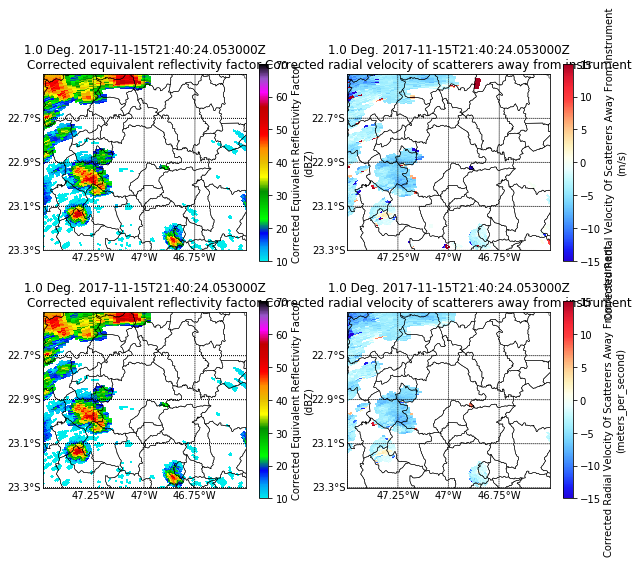

In [7]:
read_dealise_grid_radar(case_20171115[0])

## CTH

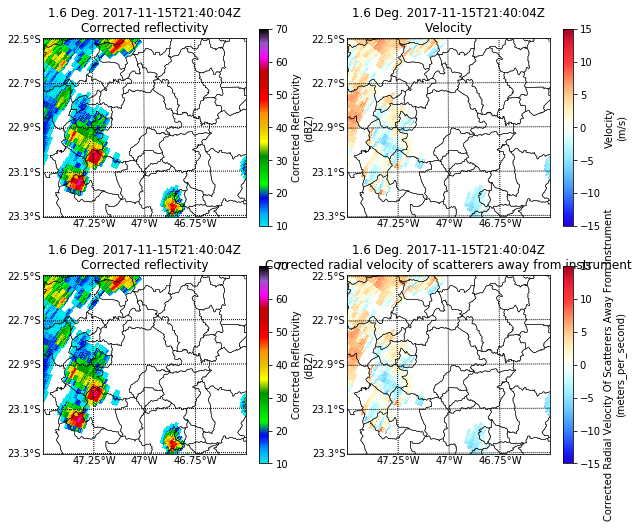

In [9]:
read_dealise_grid_radar(case_20171115[1], vel_field='velocity')

## XPOL

/home/camila/anaconda2/lib/python2.7/site-packages/pyart/correct/region_dealias.py:267: UserWarning: Velocities outside of the Nyquist interval found in sweep 7.
  warnings.warn(msg, UserWarning)
/home/camila/anaconda2/lib/python2.7/site-packages/pyart/correct/region_dealias.py:267: UserWarning: Velocities outside of the Nyquist interval found in sweep 8.
  warnings.warn(msg, UserWarning)
/home/camila/anaconda2/lib/python2.7/site-packages/pyart/correct/region_dealias.py:267: UserWarning: Velocities outside of the Nyquist interval found in sweep 9.
  warnings.warn(msg, UserWarning)
/home/camila/anaconda2/lib/python2.7/site-packages/pyart/correct/region_dealias.py:267: UserWarning: Velocities outside of the Nyquist interval found in sweep 10.
  warnings.warn(msg, UserWarning)
/home/camila/anaconda2/lib/python2.7/site-packages/pyart/correct/region_dealias.py:267: UserWarning: Velocities outside of the Nyquist interval found in sweep 11.
  warnings.warn(msg, UserWarning)
/home/camila/anaco

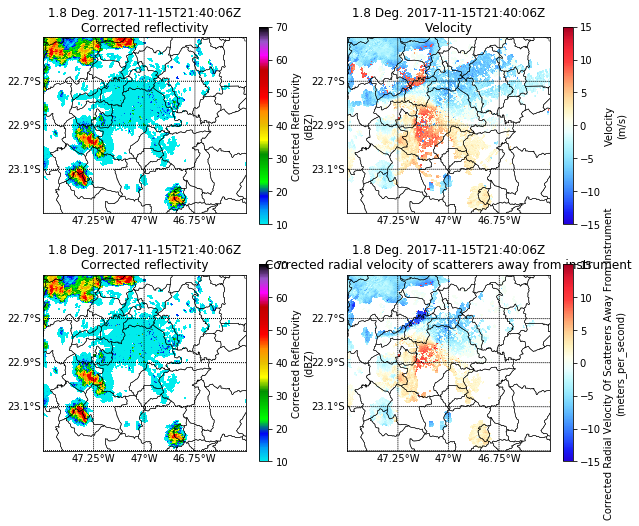

In [10]:
read_dealise_grid_radar(case_20171115[2], vel_field='velocity')